In [215]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore")

In [216]:
##股票代码列表
stock_df = pd.read_csv("F:/AHresearch/AHdata tech factor/code1.csv", header=None, encoding='unicode_escape')
stock_list = stock_df[0][1:].tolist()

##原始因子列表
stock_test = pd.read_csv("F:/AHresearch/AHdata tech factor/0038.HK.csv", header=3, index_col = None, encoding='unicode_escape')
FactorList = list(stock_test.columns)

#  月线日期列表
stock_test.index=stock_test['Date']
DateList = stock_test['Date']



# print(FactorList)
# print(stock_test)
# print(stock_list)
# type(DateList[5])

In [217]:
order = ['Date', 'close', 'premiumrate_ah','amt', 'turn', 'pe_ttm', 'pb_mrq', 'ps_ttm',
       'pcf_ocf_ttm', 'dividendyield2', 'ev', 'MA', 'MA.1', 'MA.2', 'open',
       'high', 'volume', 'low', 'pct_chg', 'RSI', 'MACD', 'MACD.1', 'Date',
       'ADTM', 'ATR', 'BBI', 'BBIBOLL', 'BIAS', 'BOLL', 'CCI', 'CDP', 'DMA',
       'DMI_2', 'DPO', 'ENV', 'EXPMA', 'KDJ', 'slowKD', 'MIKE', 'MTM',
       'PRICEOSC', 'PVT', 'RC', 'ROC', 'SAR', 'SI', 'SOBV', 'SRMI', 'STD',
       'TAPI', 'TRIX', 'VHF', 'VMA', 'VMACD', 'VOSC', 'VSTD', 'WVAD',
       'vol_ratio', 'Code', 'HSclose', 'HSrate', 'sign']

In [218]:
for s in stock_list:
    df = pd.read_excel(str("F:/AHresearch/AHdata/"+s+".xlsx"), header=3)
    df2 = pd.read_csv(str("F:/AHresearch/AHdata tech factor/"+s+".csv"), header=3)
    df2['Date'] = pd.to_datetime( df2['Date'],errors = 'coerce')
    df.index = df['Date']
    df2.index = df2['Date']
    df = df.drop(['BIAS'],axis = 1)
    df2 = df2.drop(['2'],axis = 1)
    df = pd.concat([df,df2], axis = 1,join='outer', join_axes=[df.index])
    df = df.dropna(axis = 0 , subset = ['premiumrate_ah','close','MA.2','MACD.1','amt'])
    df = df.fillna(0)
    df['Code'] = s
    df['Code'] = df['Code'].fillna(method = 'ffill')
    df['HSclose'] = (df['premiumrate_ah']/100+1)*df['close']
    df['HSrate'] = df['HSclose']/df['HSclose'].shift(1) - 1
    df['sign']=df['HSrate'].apply(lambda x:1 if x>0 else 0)
    df = df.drop(['premiumrate_ah'],axis = 1)
    df['premiumrate_ah'] = df['HSclose'].shift(1)/df['open']
    df = df[order]
    df = df.drop(['close'],axis = 1)
    df.to_csv(str("F:/AHresearch/Data Pre-process2/"+s+".csv"), index=None)

In [219]:
df

,Date,Date,premiumrate_ah,amt,turn,pe_ttm,pb_mrq,ps_ttm,pcf_ocf_ttm,dividendyield2,...,VMA,VMACD,VOSC,VSTD,WVAD,vol_ratio,Code,HSclose,HSrate,sign
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,2008-01-02,2008-01-02 00:00:00,NaN,11393540.0,0.892353,29.798241,1.767843,5.971500,40.899655,1.073139,...,25597.917500,-1351.685465,-3.675178,9848.639910,-7335.540746,1.264781,1065.HK,10.894434,NaN,0
2008-01-03,2008-01-03,2008-01-03 00:00:00,2.897456,13049120.0,1.011176,29.955072,1.769870,6.002929,41.114916,1.067521,...,27354.334000,-372.157583,-5.874919,10072.522933,34937.599351,1.501288,1065.HK,11.068051,0.015936,1
2008-01-04,2008-01-04,2008-01-04 00:00:00,2.912645,5519880.0,0.419412,30.660820,1.815070,6.144359,42.083592,1.042949,...,25171.945000,-1205.494342,-4.523518,8919.321726,63812.349351,0.521307,1065.HK,10.993132,-0.006769,0
2008-01-07,2008-01-07,2008-01-07 00:00:00,2.818752,8559420.0,0.643529,31.601818,1.868229,6.332933,43.375160,1.011893,...,23368.611667,-1236.792437,2.213030,8932.232758,65294.925109,0.924520,1065.HK,11.254882,0.023810,1
2008-01-08,2008-01-08,2008-01-08 00:00:00,2.778983,7355940.0,0.548235,30.660820,1.814953,6.144359,42.083592,1.042949,...,23900.000000,-1505.680774,9.349610,8014.723218,29332.541856,0.770694,1065.HK,11.336726,0.007272,1
2008-01-09,2008-01-09,2008-01-09 00:00:00,2.899419,11028180.0,0.851765,29.955072,1.770934,6.002929,41.114916,1.067521,...,23624.000000,-875.941656,11.911750,7174.338409,36648.777150,1.211715,1065.HK,11.554926,0.019247,1
2008-01-10,2008-01-10,2008-01-10 00:00:00,2.985769,11040700.0,0.852353,30.425571,1.800255,6.097216,41.760700,1.051013,...,22544.000000,-370.978625,9.807023,6910.715979,36688.007919,1.226719,1065.HK,11.555984,0.000092,1
2008-01-11,2008-01-11,2008-01-11 00:00:00,2.963073,6676030.0,0.516471,29.327742,1.732656,5.877213,40.253870,1.090355,...,23204.000000,-882.121792,10.678883,6924.291515,15213.960300,0.778921,1065.HK,11.401823,-0.013340,0
2008-01-14,2008-01-14,2008-01-14 00:00:00,3.048616,1693620.0,0.133529,28.621994,1.687748,5.735783,39.285194,1.117241,...,19736.000000,-2311.169895,6.246609,8520.532144,19584.697142,0.195656,1065.HK,11.681690,0.024546,1


In [220]:
df.columns

Index(['Date', 'Date', 'premiumrate_ah', 'amt', 'turn', 'pe_ttm', 'pb_mrq',
       'ps_ttm', 'pcf_ocf_ttm', 'dividendyield2', 'ev', 'MA', 'MA.1', 'MA.2',
       'open', 'high', 'volume', 'low', 'pct_chg', 'RSI', 'MACD', 'MACD.1',
       'Date', 'Date', 'ADTM', 'ATR', 'BBI', 'BBIBOLL', 'BIAS', 'BOLL', 'CCI',
       'CDP', 'DMA', 'DMI_2', 'DPO', 'ENV', 'EXPMA', 'KDJ', 'slowKD', 'MIKE',
       'MTM', 'PRICEOSC', 'PVT', 'RC', 'ROC', 'SAR', 'SI', 'SOBV', 'SRMI',
       'STD', 'TAPI', 'TRIX', 'VHF', 'VMA', 'VMACD', 'VOSC', 'VSTD', 'WVAD',
       'vol_ratio', 'Code', 'HSclose', 'HSrate', 'sign'],
      dtype='object')

In [221]:
# df['pct_chg']

In [222]:
Factor_by_stock={}
for s in stock_list:
    df = pd.read_csv(str("F:/AHresearch/Data Pre-process2/"+s+".csv"))
    df.drop([len(df)-2],inplace=True)#2012-08-08-2020-01-10
    DateList = df['Date']
    Factor_by_stock[s]=df
    Factor_by_stock[s].index=DateList
    Factor_by_stock[s] = Factor_by_stock[s].drop(['Date.1','Date.2','Date.3','Code'],axis = 1)

In [223]:
FactorList = Factor_by_stock[s].columns

In [224]:
#设计多级索引
DateList = Factor_by_stock['0042.HK']['Date'][1:]
i = 1
DateList_new = pd.DataFrame([np.nan]*np.ones(len(stock_list)))
DateList_new[:] = DateList[0]
while i <= (len(DateList)-1):
    data_temp = pd.DataFrame([np.nan]*np.ones(len(stock_list)))
    data_temp[:] = DateList[i]
    DateList_new = DateList_new.append(data_temp)
    i = i+1
# pd.MultiIndex.from_arrays(arrays,names=('Date', 'Code'))

In [225]:
#设计多级索引
i = 1
stock_df_new = stock_df[0][1:]
stock_list_new = stock_df[0][1:]
while i <= (len(DateList)-1):
    data_temp = stock_df[0][1:]
    stock_list_new = stock_list_new.append(data_temp)
    i = i+1

In [226]:
DateList2 = DateList_new[0].tolist()
stock_list2 = stock_list_new.tolist()

In [227]:
Factor_by_stock[s].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2964 entries, 2008-01-02 to 2020-01-13
Data columns (total 59 columns):
Date              2964 non-null object
premiumrate_ah    2963 non-null float64
amt               2964 non-null float64
turn              2964 non-null float64
pe_ttm            2964 non-null float64
pb_mrq            2964 non-null float64
ps_ttm            2964 non-null float64
pcf_ocf_ttm       2964 non-null float64
dividendyield2    2964 non-null float64
ev                2964 non-null float64
MA                2964 non-null float64
MA.1              2964 non-null float64
MA.2              2964 non-null float64
open              2964 non-null float64
high              2964 non-null float64
volume            2964 non-null float64
low               2964 non-null float64
pct_chg           2964 non-null float64
RSI               2964 non-null float64
MACD              2964 non-null float64
MACD.1            2964 non-null float64
ADTM              2964 non-null float64
ATR 

In [228]:
arrays = [DateList2,stock_list2]
Factor = pd.DataFrame([np.nan]*np.ones((len(DateList2),len(FactorList))),columns = FactorList,index=pd.MultiIndex.from_arrays(arrays,names=('Date', 'Code')))

In [229]:
for s in stock_list:
    Factor_by_stock[s] = Factor_by_stock[s].drop(['Date'],axis = 1)

In [230]:
for s in stock_list:
    print(s)
    for date in DateList:
        if date >= Factor_by_stock[s].index[0]:
            Factor.loc[date].loc[s] = Factor_by_stock[s].loc[date]

0038.HK
0042.HK
0107.HK
0168.HK
0177.HK
0187.HK
0317.HK
0323.HK
0338.HK
0347.HK
0358.HK
0386.HK
0390.HK
0525.HK
0548.HK
0553.HK
0564.HK
0568.HK
0588.HK
0598.HK
0670.HK
0719.HK
0753.HK
0763.HK
0811.HK
0857.HK
0874.HK
0895.HK
0902.HK
0914.HK
0921.HK
0939.HK
0991.HK
0995.HK
0998.HK
1033.HK
1053.HK
1055.HK
1057.HK
1065.HK


In [231]:
Factor

Date  premiumrate_ah           amt      turn      pe_ttm  \
Date       Code                                                                
2008-01-03 0038.HK   NaN             NaN           NaN       NaN         NaN   
           0042.HK   NaN        3.741955  1.343916e+07  2.678814  136.263153   
           0107.HK   NaN             NaN           NaN       NaN         NaN   
           0168.HK   NaN        1.627631  1.621909e+08  0.867716   52.215012   
           0177.HK   NaN        1.406614  2.571864e+07  0.251718   26.390793   
           0187.HK   NaN        3.570246  9.597940e+06  2.774000  -11.325042   
           0317.HK   NaN        1.973456  3.026860e+07  0.443462   26.470335   
           0323.HK   NaN        2.104719  6.118726e+07  0.686179   14.549986   
           0338.HK   NaN        3.917844  6.621272e+07  0.617082   12.466587   
           0347.HK   NaN        1.440873  2.084170e+08  0.883948   17.500433   
           0358.HK   NaN        2.828551  1.843290e+08  0.720007   12.431630   
           0386.HK   NaN        2.195974  1.352753e+09  0.719686   13.743130   
           0390.HK   NaN             NaN           NaN       NaN         NaN   
           0525.HK   NaN        1.804038  5.284323e+07  0.657138   28.833197   
           0548.HK   NaN        1.609984  5.081400e+06  0.080535   22.567822   
           0553.HK   NaN        4.207661  6.258140e+06  0.895868   16.724123   
           0564.HK   NaN             NaN           NaN       NaN         NaN   
           0568.HK   NaN             NaN           NaN       NaN         NaN   
           0588.HK   NaN        3.160730  6.081511e+07  1.618455   31.803196   
           0598.HK   NaN             NaN           NaN       NaN         NaN   
           0670.HK   NaN        2.937724  1.525796e+08  1.284661  -16.569294   
           0719.HK   NaN        3.428852  1.432900e+06  0.329333   41.242062   
           0753.HK   NaN        2.780676  3.419307e+08  0.723293   42.649761   
           0763.HK   NaN        1.657545  3.794705e+07  0.586821   42.509624   
           0811.HK   NaN             NaN           NaN       NaN         NaN   
           0857.HK   NaN        2.428974  2.399624e+09  0.851837   16.418251   
           0874.HK   NaN        2.587583  6.488140e+06  0.406548   22.638041   
           0895.HK   NaN             NaN           NaN       NaN         NaN   
           0902.HK   NaN        2.011301  6.182606e+07  0.256274   13.207162   
           0914.HK   NaN        1.198702  1.375556e+08  0.484351   47.568451   
...                  ...             ...           ...       ...         ...   
2020-01-13 0358.HK   NaN        1.735257  2.393547e+07  0.159358   13.902982   
           0386.HK   NaN        1.211270  3.945861e+08  0.326988   11.329714   
           0390.HK   NaN        1.363438  4.781303e+07  0.234133    5.704982   
           0525.HK   NaN        1.388453  3.174390e+06  0.088730   22.980539   
           0548.HK   NaN        1.143974  3.392316e+07  0.411482    5.335386   
           0553.HK   NaN        2.554439  3.943758e+07  3.271901   32.118183   
           0564.HK   NaN        1.765206  4.304826e+06  0.408989    5.672210   
           0568.HK   NaN        4.158962  0.000000e+00  0.000000  -37.316715   
           0588.HK   NaN        1.425490  4.030260e+06  0.222342    5.124963   
           0598.HK   NaN        1.839237  4.728937e+07  0.809427    6.482461   
           0670.HK   NaN        1.477300  3.848230e+07  0.170979   25.016209   
           0719.HK   NaN        2.151341  8.967200e+05  0.116923    7.278806   
           0753.HK   NaN        1.334888  1.233711e+08  0.337698   14.625537   
           0763.HK   NaN        1.529534  3.145539e+08  1.516323   23.898386   
           0811.HK   NaN        2.536779  7.398140e+06  0.283525    6.072621   
           0857.HK   NaN        1.668439  4.546663e+08  0.540446   15.994370   
           0874.HK   NaN        1.509581  2.129018e+07  0.365848   12.316506   
           0895.HK  

In [232]:
#设置参数
percent_cv = 0.1
seed = 42
svm_kernel = 'linear' #__svm parameter
svm_c = 0.01 #--svm parameter

In [343]:
def normalization(premethod,X_in_sample):
    from sklearn import preprocessing
    if premethod == 'Standardization':
        scaler = preprocessing.StandardScaler().fit(X_in_sample)
    if premethod == 'Rescaling':
        scaler = preprocessing.MinMaxScaler().fit(X_in_sample)
    if premethod == 'Scaling to unit length':
        scaler = preprocessing.MaxAbsScaler().fit(X_in_sample)
    return scaler

In [344]:
import time
start = time.clock()
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import roc_auc_score
n_stock_select = 10
strategy = pd.DataFrame()
AUC_train = pd.DataFrame()
AUC_test = pd.DataFrame()
time_train = 300
time_test = 10
premethod = 'Standardization'
n_stock_select = 10#设置选股个数为10
for initial_time in range(0,(len(DateList)-(time_train+time_test)),time_test):  
    TrainList = DateList[initial_time:initial_time+time_train]
    TestList = DateList[initial_time+time_train:initial_time+time_train+time_test]
    Factor_train = Factor.iloc[initial_time*len(stock_list):(initial_time+time_train)*len(stock_list),:]
    Factor_test =  Factor.iloc[(initial_time+time_train)*len(stock_list):(initial_time+time_train+time_test)*len(stock_list),:]
    Factor_train = Factor_train.drop(['Date'],axis = 1)
    Factor_train = Factor_train.dropna(axis = 0)
    Factor_test = Factor_test.drop(['Date'],axis = 1)
    Factor_test = Factor_test.dropna(axis = 0)
    X_in_sample = Factor.loc[:,'premiumrate_ah':'vol_ratio']
    X_in_sample = X_in_sample.dropna(axis = 0)
    scaler = normalization(premethod,X_in_sample)
    X_train = Factor_train.loc[:,'premiumrate_ah':'vol_ratio']
    y_train = Factor_train.loc[:,'sign']
    X_test = Factor_test.loc[:,'premiumrate_ah':'vol_ratio']
    y_test = Factor_test.loc[:,'HSclose':'sign']
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    clf=tree.DecisionTreeClassifier()
    clf=clf.fit(X_train,y_train)
    importance =clf.feature_importances_.round(4).tolist()
    y_pred_train=clf.predict_proba(X_train)[:,1]
    AUC_train_curr = pd.DataFrame({'AUC_train':[roc_auc_score(y_train, y_pred_train)]})
    AUC_train =  AUC_train.append(AUC_train_curr )
    y_pred_test=clf.predict_proba(X_test)[:,1]
    AUC_test_curr = pd.DataFrame({'AUC_test':[roc_auc_score(y_test['sign'], y_pred_test)]})
    AUC_test =  AUC_test.append(AUC_test_curr )
    y_pred_test=pd.DataFrame({'result':y_pred_test})
    y_pred_test.index = y_test.index
    #初始化策略的收益和净值。变量strategy 是DataFrame 类型，有两列'return'和'value'，分别表示策略的每月收益和每月净值。'return'列的初始值均为0，'value'列的初始值均为1。
    #--loop for days
    strategy_temp = pd.DataFrame({'return':[0]*(time_test),'value':[1]*(time_test)},index = TestList)
    for date in TestList:
        y_true_curr_day = y_test.loc[date]
        y_pred_curr_day= y_pred_test.loc[date]
        #y_true_curr_month 为当前日的真实收益，y_score_curr_month 为当前日的预测的决策函数值，均为只包含一列的DataFrame 类型。其中，函数iloc 是按索引获取切片，列为i_month-1 是因为列的索引从0 开始。
        #-- sort predicted return,and choose the best 10
        y_pred_curr_day = y_pred_curr_day.sort_values(by = 'result',ascending = False)
        index_select = y_pred_curr_day.iloc[0:n_stock_select].index
    #         if i_day == 45:
    #             y_true_temp = y_true_curr_day.sort_values(ascending = False)
    #             print(y_true_temp)
    #             print(index_select)
        #-- take the average return as the return of the portfolio
        strategy_temp.loc[date,'return'] = np.mean(y_true_curr_day['HSrate'][index_select])
        strategy_temp = strategy_temp.fillna(0)
    strategy = strategy.append(strategy_temp)
strategy['value'] = (strategy['return']+1).cumprod()
end = time.clock()
print (end-start)

442.0791504000008


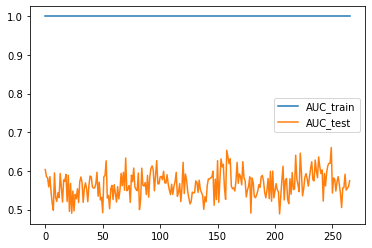

In [345]:
import matplotlib.pyplot as plt
plt.plot(range(266),AUC_train, label='AUC_train')   
plt.plot(range(266),AUC_test, label='AUC_test')
plt.legend()
plt.show()

In [346]:
Factor_importance = pd.DataFrame({'factor':FactorList[1:-3],'importance':importance})

In [347]:
Factor_importance

,factor,importance
0,premiumrate_ah,0.0225
1,amt,0.0127
2,turn,0.0270
3,pe_ttm,0.0230
4,pb_mrq,0.0146
5,ps_ttm,0.0162
6,pcf_ocf_ttm,0.0166
7,dividendyield2,0.0090
8,ev,0.0217
9,MA,0.0042


In [348]:
strategy['value'] = (strategy['return']+1).cumprod()

In [349]:
FinalTestList = DateList['2009-03-26':'2020-01-07']
FinalTestList = pd.to_datetime( FinalTestList ,errors = 'coerce')

In [350]:
strategy.index = FinalTestList

In [351]:
#计算胜率
def WinRate(return_list,basereturn_list):
    excess_return = return_list - basereturn_list
    return np.sum([excess_return>0])  / len(excess_return)

In [352]:
SH000001_df = pd.read_excel("C:/Users/Administrator/Desktop/000001_SH.xlsx", header=3)
SH000001_df['Date'] = pd.to_datetime( SH000001_df['Date'],errors = 'coerce')
SH000001_df['pct_chg'] = SH000001_df['pct_chg']/100
SH000001_df.index = SH000001_df['Date']
SH000001_df = SH000001_df.drop(['Date'], axis = 1)
SH000001_df = SH000001_df.reindex(FinalTestList)
strategy['000001_SH_rate'] = SH000001_df
strategy['000001_SH_rate'] = strategy['000001_SH_rate'].fillna(0)
strategy['000001_SH_value'] = (strategy['000001_SH_rate']+1).cumprod()

In [353]:
SH000300_df = pd.read_excel("C:/Users/Administrator/Desktop/000300_SH.xlsx")
SH000300_df['Date'] = pd.to_datetime( SH000300_df['Date'],errors = 'coerce')
SH000300_df.index = SH000300_df['Date']
SH000300_df = SH000300_df.drop(['Date'], axis = 1)
SH000300_df = SH000300_df.reindex(FinalTestList)
strategy['000300_SH_rate'] = SH000300_df
strategy['000300_SH_rate'] = strategy['000300_SH_rate'].fillna(0)
strategy['000300_SH_value'] = (strategy['000300_SH_rate']+1).cumprod()

In [354]:
SH000905_df = pd.read_excel("C:/Users/Administrator/Desktop/000905_SH.xlsx")
SH000905_df['Date'] = pd.to_datetime( SH000905_df['Date'],errors = 'coerce')
SH000905_df.index = SH000905_df['Date']
SH000905_df = SH000905_df.drop(['Date'], axis = 1)
SH000905_df = SH000905_df.reindex(FinalTestList)
strategy['000905_SH_rate'] = SH000905_df
strategy['000905_SH_rate'] = strategy['000905_SH_rate'].fillna(0)
strategy['000905_SH_value'] = (strategy['000905_SH_rate']+1).cumprod()

In [355]:
SZ399006_df = pd.read_excel("C:/Users/Administrator/Desktop/399006_SZ.xlsx")
SZ399006_df['Date'] = pd.to_datetime( SZ399006_df['Date'],errors = 'coerce')
strategy1 = strategy.reindex(SZ399006_df['Date'])
SZ399006_df.index = SZ399006_df['Date']
SZ399006_df =SZ399006_df.drop(['Date'], axis = 1)
SZ399006_df = SZ399006_df.loc[FinalTestList]
strategy1['399006_SZ_rate'] = SZ399006_df
strategy1['399006_SZ_rate'] = strategy1['399006_SZ_rate'].fillna(0)
strategy1['399006_SZ_value'] = (strategy1['399006_SZ_rate']+1).cumprod()

In [356]:
print("对上证指数胜率为 %2f."% WinRate(strategy['return'],strategy['000001_SH_rate']))
print("对沪深300指数胜率为 %2f."% WinRate(strategy['return'],strategy['000300_SH_rate']))
print("对中证500指数胜率为 %2f."% WinRate(strategy['return'],strategy['000905_SH_rate']))
print("对创业板指数胜率为 %2f."% WinRate(strategy1['return'],strategy1['399006_SZ_rate']))

对上证指数胜率为 0.605263.
对沪深300指数胜率为 0.594361.
对中证500指数胜率为 0.548496.
对创业板指数胜率为 0.522031.


In [357]:
strategy1

,return,value,000001_SH_rate,000001_SH_value,000300_SH_rate,000300_SH_value,000905_SH_rate,000905_SH_value,399006_SZ_rate,399006_SZ_value
Date,,,,,,,,,,
2010-06-01,-0.005569,1.738617,-0.009206,1.032434,-0.0105,1.042932,-0.0191,1.315532,-0.0268,0.973200
2010-06-02,0.001112,1.740550,0.001223,1.033696,0.0049,1.048042,0.0144,1.334476,0.0245,0.997043
2010-06-03,-0.001543,1.737864,-0.007298,1.026152,-0.0078,1.039868,-0.0073,1.324734,0.0013,0.998340
2010-06-04,-0.000485,1.737022,0.000367,1.026529,0.0030,1.042987,0.0086,1.336127,0.0293,1.027591
2010-06-07,-0.019981,1.702314,-0.016394,1.009700,-0.0177,1.024526,-0.0040,1.330782,0.0407,1.069414
2010-06-08,0.004118,1.709324,0.000883,1.010591,0.0013,1.025858,0.0090,1.342759,-0.0022,1.067061
2010-06-09,0.028525,1.758083,0.027814,1.038700,0.0307,1.057352,0.0250,1.376328,0.0100,1.077732
2010-06-10,-0.004207,1.750687,-0.008240,1.030142,-0.0115,1.045192,0.0028,1.380182,0.0368,1.117392
2010-06-11,-0.005888,1.740378,0.002873,1.033101,0.0032,1.048537,-0.0061,1.371763,0.0042,1.122085


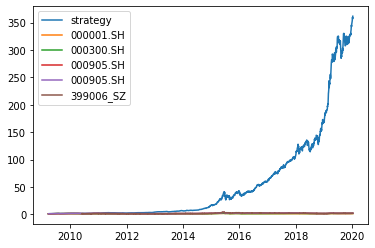

In [358]:
#-- plot the value
import matplotlib.pyplot as plt
plt.plot(FinalTestList,strategy.loc[FinalTestList,'value'], label='strategy')   
plt.plot(FinalTestList,strategy.loc[FinalTestList,'000001_SH_value'], label='000001.SH')
plt.plot(FinalTestList,strategy.loc[FinalTestList,'000300_SH_value'], label='000300.SH')
plt.plot(FinalTestList,strategy.loc[FinalTestList,'000905_SH_value'], label='000905.SH')
plt.plot(FinalTestList,strategy.loc[FinalTestList,'000905_SH_value'], label='000905.SH')
plt.plot(FinalTestList,strategy1.loc[FinalTestList,'399006_SZ_value'],label = '399006_SZ')
plt.legend()
plt.show()


In [359]:
def ann_return(return_list):
    ar = pow((return_list+1).cumprod()[-1],1/5)-1
    return ar

In [360]:
def ann_excess_return(return_list,basereturn_list):
    excess_return = return_list - basereturn_list
    aer  = pow((excess_return+1).cumprod()[-1],1/5)-1
    return aer

In [361]:
def IR(return_list,basereturn_list):
    excess_return = return_list - basereturn_list #计算每期超额收益
    #计算股票及指数年化收益率
    aer  = pow((excess_return+1).cumprod()[-1],1/5)-1
    aer_std = np.std(excess_return)*np.sqrt(365)#计算每期超额收益标准差
    return aer/aer_std

In [362]:
def SharpeRatio(return_list,basereturn_list):
    excess_return = return_list - basereturn_list #计算每期超额收益
    aer  = pow((excess_return+1).cumprod()[-1],1/5)-1
    return_std = np.std(return_list)*np.sqrt(365)
    return aer / return_std

In [363]:
def MaxDrawdown(return_list):
    i = np.argmax((np.maximum.accumulate(return_list) - return_list) / np.maximum.accumulate(return_list))  # 结束位置
    if i == 0:
        return 0
    j = np.argmax(return_list[:i])  # 开始位置
    mdd = ((return_list[j]) - (return_list[i])) / (return_list[j])
    return mdd

In [364]:
def MddHappen(return_list):
    i = np.argmax((np.maximum.accumulate(return_list) - return_list) / np.maximum.accumulate(return_list))  # 结束位置
    if i == 0:
        return 0
    j = np.argmax(return_list[:i])  # 开始位置
    print('The MaxDrawdown happens at ')
    print(j)
    print('The MaxDrawdown keeps for ')
    print(i - j)
    return 0
    

In [365]:
def Calmar(aer,mdd):
    return aer / mdd

In [366]:
#--evaluation
# ann_excess_return = np.mean(strategy['return'])*365
# ann_excess_vol = np.std(strategy['return'])*np.sqrt(365)
# info_ratio  = ann_excess_return/ann_excess_vol
print('annual return = %.3f'%ann_return(strategy['return']))
print('annual excess return = %.3f'%ann_excess_return(strategy['return'],strategy['000001_SH_rate']))
print('information ratio = %.3f'%IR(strategy['return'],strategy['000001_SH_rate']))
print('SharpeRatio = %.3f'%SharpeRatio(strategy['return'],strategy['000001_SH_rate']))
print('MaxDrawdown = %.3f'%MaxDrawdown(strategy['value']))
MddHappen(strategy['value'])
print('Calmar = %.3f'%Calmar(ann_excess_return(strategy['return'],strategy['000001_SH_rate']),MaxDrawdown(strategy['value'])))
    #-- print out
#     print('annual excess volatility = %.2f'%ann_excess_vol[i])
#     print('information ratio = %.2f'%info_ratio[i])

annual return = 2.248
annual excess return = 2.083
information ratio = 12.539
SharpeRatio = 6.694
MaxDrawdown = 0.358
The MaxDrawdown happens at 
2015-06-17 00:00:00
The MaxDrawdown keeps for 
21 days 00:00:00
Calmar = 5.819
